# Задача 4_ТехноТест_Аналитик данных

В решении данной задачи будут рассмотрены следующие задачи анализа:
1. Доли зарегистрированных пользователей в компаниях
2. Доля активных зарегистрированных пользователей в компаниях
3. Предпочитаемые платформы пользователей в компаниях
4. Зависимость регистрации пользователей от их местонахождения в Москве

##### Так как на входе мы получаем большой массив данных, для упрощения работы с ней запишем в переменную data полную информацию файла Analytic_test.xlsx. 
##### В самом файле некоторые из представленных данных имеют неправильный формат ячейки (некоторые значения в стобце, например Blue_activity_count, имеют формат даты, а не числовой формат). Поэтому предварительно в самом файле все стобцы (кроме HID) отформатируем в числовой формат для правильности в работе с данными. При проверке правильности предобработки данных мы должны получить следующее: все столбцы таблицы кроме HID (имеющий формат object) должны иметь числовой формат (float64)


In [169]:
import pandas as pd

# Загрузка данных из файла Excel и преобразуем таблицу в удобный для чтения формат
data = pd.read_excel('/Users/danielchernikov/Desktop/Analytic_test.xlsx', header= 1, index_col=0)
data.index = data.index + 1

In [147]:
data.dtypes

HID                       object
active_Red               float64
has_Green_id             float64
has_Black_id             float64
has_Blue_id              float64
Blue_activity_count      float64
Blue_gmv_total           float64
Green_gvm_total          float64
Green_gvm_order_count    float64
Black_gvm_total          float64
Black_gvm_order_count    float64
Red_android              float64
Green_android            float64
Black_android            float64
Blue_android             float64
Red_apple                float64
Green_apple              float64
Black_apple              float64
Blue_apple               float64
is_msk                   float64
Red_web                  float64
Green_web                float64
Black_web                float64
Blue_web                 float64
dtype: object

### Часть 1. Используя столбцы "active_Red", "has_Green_id", "has_Black_id" и "has_Blue_id", можно проанализировать долю зарегистрированных пользователей в каждой компании и сравнить их. Например, мы можем выяснить, в какой компании число зарегистрировавшихся пользователей.

In [148]:
# количество зарегистрировавшихся пользователей (активных аккаунтов у Red) в компании Red, Blue, Green, Black
active_red_count = len(data[(data['active_Red']!= 0)])
active_red = data[(data['active_Red']!= 0)]
print("Количество зарегистрированных и активных пользователей в компании Red: ", active_red_count)
registered_blue_count = len(data[(data['has_Blue_id']!= 0)])
registered_blue = data[(data['has_Blue_id']!= 0)]
print("Количество зарегистрированных пользователей в компании Blue: ", registered_blue_count)
registered_green_count = len(data[(data['has_Green_id']!= 0)])
registered_green = data[(data['has_Green_id']!= 0)]
print("Количество зарегистрированных пользователей в компании Green: ", registered_green_count)
registered_black_count = len(data[(data['has_Black_id']!= 0)])
registered_black = data[(data['has_Black_id']!= 0)]
print("Количество зарегистрированных пользователей в компании Black: ", registered_black_count)

unactive_red = data[(data['active_Red']== 0)]
unregistered_blue = data[(data['has_Blue_id']== 0)]
unregistered_green = data[(data['has_Green_id']== 0)]
unregistered_black = data[(data['has_Black_id']== 0)]

Количество зарегистрированных и активных пользователей в компании Red:  55874
Количество зарегистрированных пользователей в компании Blue:  13266
Количество зарегистрированных пользователей в компании Green:  886
Количество зарегистрированных пользователей в компании Black:  1079


In [149]:
# Посчитаем сколько пользователей не зарегистрировано ни в одной из компаний
not_registered_users = data[(data['active_Red'] == 0) & (data['has_Green_id'] == 0) & (data['has_Black_id'] == 0) & (data['has_Blue_id'] == 0)].count()[0]
print('Пользователей не зарегистрировано ни в одной из компаний:', not_registered_users)

Пользователей не зарегистрировано ни в одной из компаний: 38354


In [150]:
# Посчитаем сколько пользователей зарегистрировано хотя бы в одной из компаний
registered_users = len(data[(data['active_Red'] >= 1) | (data['has_Green_id'] >= 1) | (data['has_Black_id'] >= 1) | (data['has_Blue_id'] >= 1)])
print('Пользователей зарегистрировано хотя бы в одной из компаний:', registered_users)

Пользователей зарегистрировано хотя бы в одной из компаний: 61646


In [151]:
# проверим правильность вычислений (где len(data['HID'].unique()) -  максимальное число пользователей в датасете)
print((registered_users + not_registered_users) == len(data['HID'].unique()))

True


In [152]:
# Расчитаем процент зарегистрированных пользователей в каждой компании от общего числа зарегистрированных
total_registered_users = len(data[(data['active_Red'] >= 1) | (data['has_Green_id'] >= 1) | (data['has_Black_id'] >= 1) | (data['has_Blue_id'] >= 1)])

percent_registered_red = len(data[data['active_Red'] >= 1]) / total_registered_users * 100
percent_registered_blue = len(data[data['has_Blue_id'] >= 1]) / total_registered_users * 100
percent_registered_green = len(data[data['has_Green_id'] >= 1]) / total_registered_users * 100
percent_registered_black = len(data[data['has_Black_id'] >= 1]) / total_registered_users * 100

print("Процент зарегистрированных пользователей в компании Red: {:.2f}%".format(percent_registered_red))
print("Процент зарегистрированных пользователей в компании Blue: {:.2f}%".format(percent_registered_blue))
print("Процент зарегистрированных пользователей в компании Green: {:.2f}%".format(percent_registered_green))
print("Процент зарегистрированных пользователей в компании Black: {:.2f}%".format(percent_registered_black))


Процент зарегистрированных пользователей в компании Red: 90.64%
Процент зарегистрированных пользователей в компании Blue: 21.52%
Процент зарегистрированных пользователей в компании Green: 1.44%
Процент зарегистрированных пользователей в компании Black: 1.75%


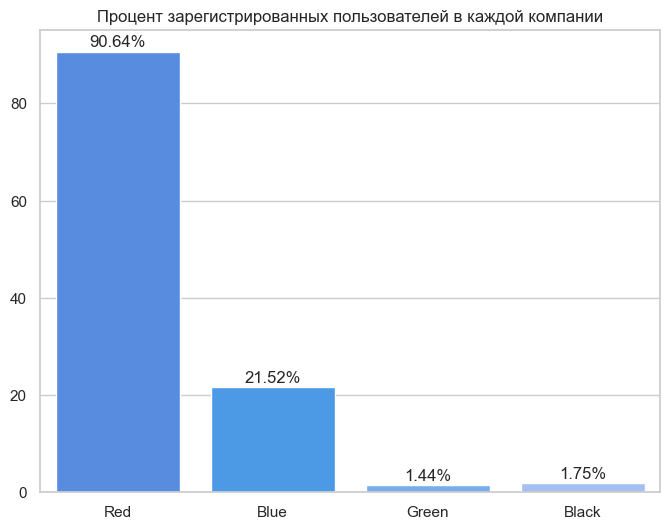

In [153]:
# Визуализируем полученные данные в виде столбчатой диаграммы
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем список с процентами
percentages = [percent_registered_red, percent_registered_blue, percent_registered_green, percent_registered_black]

# Задаем цветовую палитру в синих оттенках
colors = ['#4287f5', '#3399ff', '#66aaff', '#99bbff']

# Создаем график с помощью seaborn
sns.set(style='whitegrid', palette=colors)
plt.figure(figsize=(8, 6))
plt.title('Процент зарегистрированных пользователей в каждой компании')

# Визуализируем данные с помощью столбчатой диаграммы
sns.barplot(x=['Red', 'Blue', 'Green', 'Black'], y=percentages)

# Добавляем подписи с процентами над каждым столбиком
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, '{:.2f}%'.format(percentage), ha='center')

# Отображаем график
plt.show()


##### По итогу получаем картинку, наглядно показывающую процентное соотношение зарегистрированных пользователей в конкретной компании от общего числа зарегистрированных пользователей 
Важно отметить, что график показывает именно процентное количество зарегистрированных аккаунтов в конкретной от общего числа зарегистрированных пользователей, что подразумевает собой то, что один пользователь может быть зарегистрирован в нескольких компаниях одновременно. Поэтому один и тот же пользователь может учитываться в вычислениях для разных компаний.

#### Вывод №1: компания RED имеет наибольшее число зарегистрированных пользователей среди остальных.

### Часть 2. Проанализируем активность зарегистрировавшихся пользователей у компании - какое число зарегистрированных пользователей проявило активность в компании (RED можно не рассматривать, так как в таблице у него единственный столбец, отображающий активность пользователей, это active_Red) 
#### Для этого сравним количество активных пользователей компаний от количества зарегистрировавшихся пользователей
##### P.S. Будем отталкиваться от того, что столбец "active_Red_count" подразумевает собой наличие хотя бы одного действия зарегистрированного пользователя. Соответственно можем определить 'active_Blue_count' как удовлетворение условия 'has_Blue_id != 0' вместе с 'Blue_activity_count != 0', также и для оставшихся компаний, имеющие has_company_id != 0 и company_gvm_order_count != 0 (тут подразумевается то, что если пользователь совершил хотя бы один успешный заказ, то это уже считается как проявление активности, так как company_gvm_order_count - количество успешных заказов пользователя в компании)

In [154]:
# Для начала посмотрим, бывают ли такие ситуации в компаниях, когда пользователь не зарегистрировался, но проявил какую либо активность
not_registered_active_blue_count = data[(data['has_Blue_id'] == 0) & (data['Blue_activity_count'] != 0)].count()[0]
not_registered_active_green_count = data[(data['has_Green_id'] == 0) & (data['Green_gvm_order_count'] != 0)].count()[0]
not_registered_active_black_count = data[(data['has_Black_id'] == 0) & (data['Black_gvm_order_count'] != 0)].count()[0]
print("Количество активных не зарегистрированных пользователей в компании Blue: ", not_registered_active_blue_count)
print("Количество активных не зарегистрированных пользователей в компании Green: ", not_registered_active_green_count)
print("Количество активных не зарегистрированных пользователей в компании Black: ", not_registered_active_black_count)

Количество активных не зарегистрированных пользователей в компании Blue:  0
Количество активных не зарегистрированных пользователей в компании Green:  0
Количество активных не зарегистрированных пользователей в компании Black:  0


#### Как мы видим, в компаниях не бывает такого случая, когда пользователь проявил какую либо активность, при этом не зарегистрировавшись 

In [155]:
# Теперь также расчитаем число активных пользователей в компании Blue, Green, Black
active_blue_count = data[(data['has_Blue_id'] != 0) & (data['Blue_activity_count'] != 0)].count()[0]
active_green_count = data[(data['has_Green_id'] != 0) & (data['Green_gvm_order_count'] != 0)].count()[0]
active_black_count = data[(data['has_Black_id'] != 0) & (data['Black_gvm_order_count'] != 0)].count()[0]
print("Количество активных пользователей в компании Blue: ", active_blue_count)
print("Количество активных пользователей в компании Red: ", active_red_count)
print("Количество активных пользователей в компании Green: ", active_green_count)
print("Количество активных пользователей в компании Black: ", active_black_count)
# Можно было бы посчитать конверсию того, сколько людей, зарегистрировавшихся в компании, совершили какое либо действие, однако для компании RED в данном случае недостаточно данных 

Количество активных пользователей в компании Blue:  3888
Количество активных пользователей в компании Red:  55874
Количество активных пользователей в компании Green:  886
Количество активных пользователей в компании Black:  1079


In [156]:
# вспомним количество зарегистрировавшихся пользователей (активных аккаунтов у Red) в компании Red, Blue, Green, Black
print("Количество зарегистрированных и активных пользователей в компании Red: ", active_red_count)
print("Количество зарегистрированных пользователей в компании Blue: ", registered_blue_count)
print("Количество зарегистрированных пользователей в компании Green: ", registered_green_count)
print("Количество зарегистрированных пользователей в компании Black: ", registered_black_count)

Количество зарегистрированных и активных пользователей в компании Red:  55874
Количество зарегистрированных пользователей в компании Blue:  13266
Количество зарегистрированных пользователей в компании Green:  886
Количество зарегистрированных пользователей в компании Black:  1079


In [157]:
# перед тем как визуализировать данные, посчитаем конверсии активных пользователей от зарегистрировавшихся

# Расчет доли активных пользователей от зарегистрировавшихся
conversion_blue = (active_blue_count / registered_blue_count) * 100
conversion_green = (active_green_count / registered_green_count) * 100
conversion_black = (active_black_count / registered_black_count) * 100

#### Теперь визуализируем полученные данные. Учтем то, что мы отбросим компанию Red за неимением достаточных данных о наличии у пользователей регистрации и проявления активности в компании, что делает невозможным подсчет конверсии

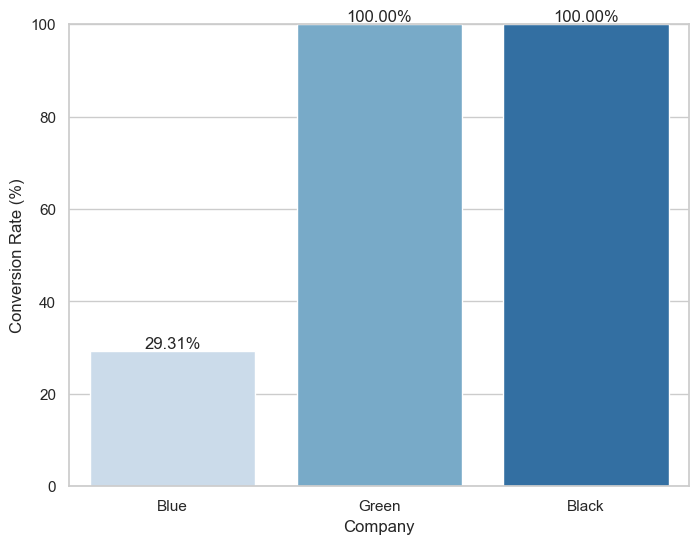

In [158]:
# Создание датафрейма с данными о доле активных пользователей
conversion_data = pd.DataFrame({'Company': ['Blue', 'Green', 'Black'],
                               'Conversion Rate': [conversion_blue, conversion_green, conversion_black]})

# Настройка визуализации
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Создание столбчатой диаграммы
ax = sns.barplot(x='Company', y='Conversion Rate', data=conversion_data, palette='Blues')
ax.set_xlabel('Company', fontsize=12)
ax.set_ylabel('Conversion Rate (%)', fontsize=12)
ax.set_ylim(0, 100)

# Добавление процентных значений над столбцами
for index, row in conversion_data.iterrows():
    ax.text(row.name, row['Conversion Rate'], f"{row['Conversion Rate']:.2f}%", ha='center', va='bottom')

# Перемещение названия графика в нижнюю часть
ax.title.set_position([0.5, -0.1])

# Отображение графика
plt.show()

#### Вывод №2: Количество зарегистрировавшихся пользователей в компании Blue намного больше количества зарегистрировавшихся пользователей в компаниях Green и Black. Однако, процент пользователей, совершивших какую либо активность в компании Blue значительно ниже того же процента у остальных компаний, что говорит нам о двух вещах:
1. Абсолютно все пользователи, которые проявили активность в компаниях Green и Black, являются зарегистрированными в них.
2. Во всех этих трех компаниях нет ни одного пользователя, который проявил активность будучи не зарегистрированным.

#### Следовательно, по полученным данным, можно выдвинуть гипотезу того, что компании Green и Black имеют более эффективные методы удержания клиентов, что приводит к тому, что большинство зарегистрированных пользователей в этих компаниях становятся активными. В то же время компания Blue может столкнуться с трудностями в привлечении и удержании клиентов, что приводит к более низкой конверсии. Кроме того, возможно, что компания Blue имеет более конкурентную среду или меньший бюджет на маркетинг, что может затруднять ее конкуренцию с другими компаниями в отрасли. Однако без дополнительных данных сложно точно определить причины разницы в конверсии между компаниями.

### Часть 3. Проанализируем какие платформы предпочитают пользователи в каждой компании.
### Также рассмотрим каково отношение пользователей, скачавших приложение (company_platform !=0), от количества пользователей, которые не только скачали но и зарегистрировались в компании через приложение (has_Green_id !=0)

Рассмотрим для начала доли используемых пользователями платформ в каждой компании и изобразим информацию на общем графике

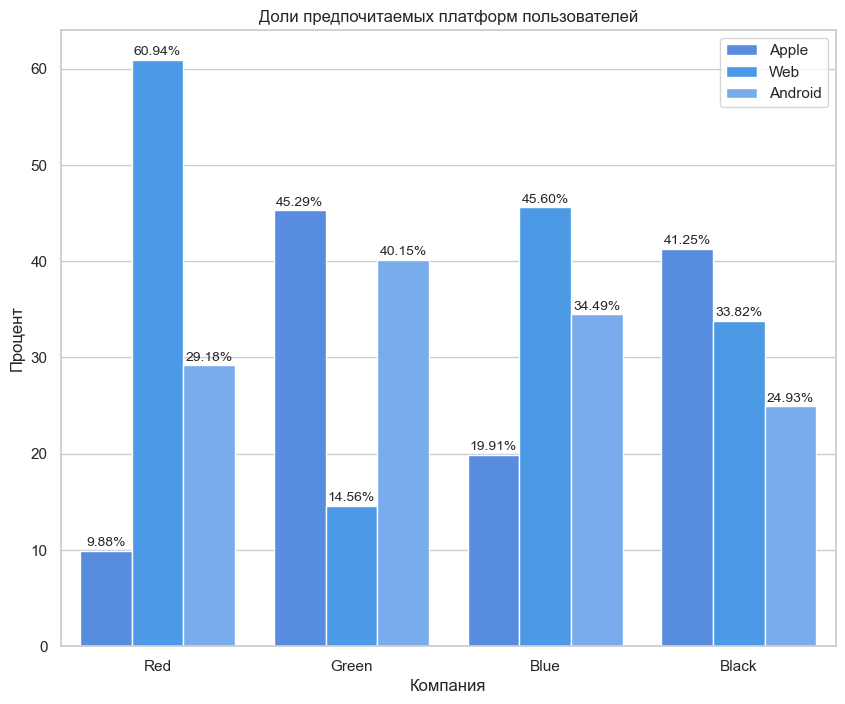

In [170]:
# Создание словаря, содержащего информацию о всех платформах и цветах
platforms = ["Apple", "Web", "Android"]
colors = ["Red", "Green", "Blue", "Black"]
data_n = {"Color": [], "Platform": [], "Count": []}

# Получение данных для каждой платформы и каждого цвета
for color in colors:
    for platform in platforms:
        data_n["Color"].append(color)
        data_n["Platform"].append(platform)
        count = data[data[f"{color}_{platform.lower()}"] == 1].count()[0]
        percent = count / all_i[colors.index(color)] * 100
        data_n["Count"].append(percent)

# Создание DataFrame из словаря
df = pd.DataFrame(data_n)

# Визуализация данных с помощью графика
sns.set(style="whitegrid", palette=['#4287f5', '#3399ff', '#66aaff', '#99bbff'])
plt.figure(figsize=(10, 8))
sns.barplot(x="Color", y="Count", hue="Platform", data=df, order=["Red", "Green", "Blue", "Black"])
plt.title("Доли предпочитаемых платформ пользователей")
plt.xlabel("Компания")
plt.ylabel("Процент")
plt.legend(loc="upper right")

# Добавление подписей на столбцах графика
for p in plt.gca().patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.annotate(f"{height:.2f}%", (x + width / 2, y + height + 0.5), ha='center', fontsize=10)

plt.show()


Однако в датасете присутствуют такие пользователи, которые имеют приложение компании, но не имеют аккаунтов. Высчитаем долю таких пользователей на разных платформах для каждой компании

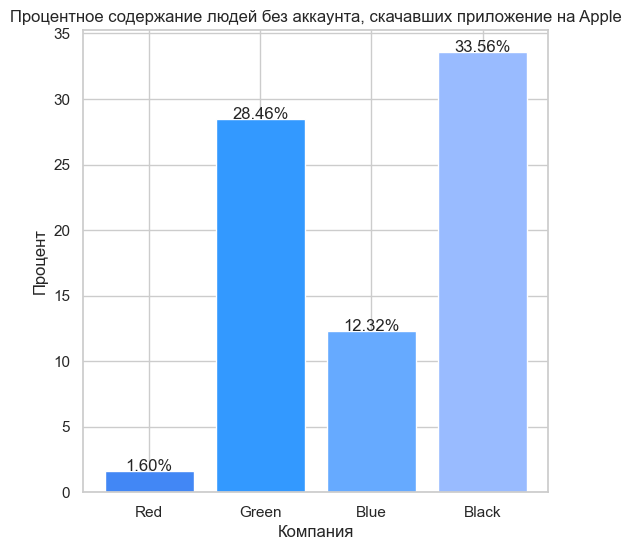

In [161]:
# Процентное содержание людей без аккаунта, скачавших приложение на Apple
not_registered_apple = {
'Company': ['Red', 'Green', 'Blue', 'Black'],
'Not Registered': [
data[data['Red_apple'] == 1].count()[0] - data[(data['Red_apple'] == 1) & (data['active_Red'] != 0)].count()[0],
data[data['Green_apple'] == 1].count()[0] - data[(data['Green_apple'] == 1) & (data['has_Green_id'] != 0)].count()[0],
data[data['Blue_apple'] == 1].count()[0] - data[(data['Blue_apple'] == 1) & (data['has_Blue_id'] != 0)].count()[0],
data[data['Black_apple'] == 1].count()[0] - data[(data['Black_apple'] == 1) & (data['has_Black_id'] != 0)].count()[0]
]
}
df = pd.DataFrame(not_registered_apple)
df['Percentage'] = df['Not Registered'] / all_i * 100

plt.figure(figsize=(6, 6))
plt.bar(df['Company'], df['Percentage'], color=['#4287f5', '#3399ff', '#66aaff', '#99bbff'])
plt.title('Процентное содержание людей без аккаунта, скачавших приложение на Apple')
plt.xlabel('Компания')
plt.ylabel('Процент')
for i, value in enumerate(df['Percentage']):
    plt.text(i, value, f"{value:.2f}%", ha='center')
plt.show()
df_apple = df

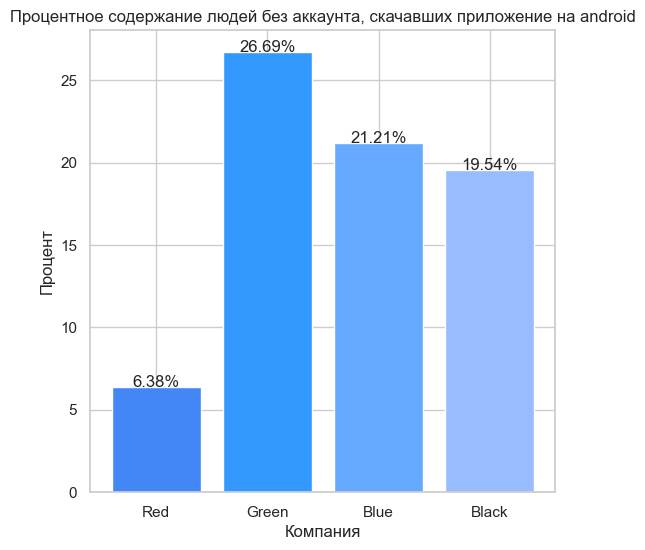

In [162]:
# Процентное содержание людей без аккаунта, скачавших приложение на Android
not_registered_apple = {
'Company': ['Red', 'Green', 'Blue', 'Black'],
'Not Registered': [
data[data['Red_android'] == 1].count()[0] - data[(data['Red_android'] == 1) & (data['active_Red'] != 0)].count()[0],
data[data['Green_android'] == 1].count()[0] - data[(data['Green_android'] == 1) & (data['has_Green_id'] != 0)].count()[0],
data[data['Blue_android'] == 1].count()[0] - data[(data['Blue_android'] == 1) & (data['has_Blue_id'] != 0)].count()[0],
data[data['Black_android'] == 1].count()[0] - data[(data['Black_android'] == 1) & (data['has_Black_id'] != 0)].count()[0]
]
}
df = pd.DataFrame(not_registered_apple)
df['Percentage'] = df['Not Registered'] / all_i * 100

plt.figure(figsize=(6, 6))
plt.bar(df['Company'], df['Percentage'], color=['#4287f5', '#3399ff', '#66aaff', '#99bbff'])
plt.title('Процентное содержание людей без аккаунта, скачавших приложение на android')
plt.xlabel('Компания')
plt.ylabel('Процент')
for i, value in enumerate(df['Percentage']):
    plt.text(i, value, f"{value:.2f}%", ha='center')
plt.show()
df_android = df

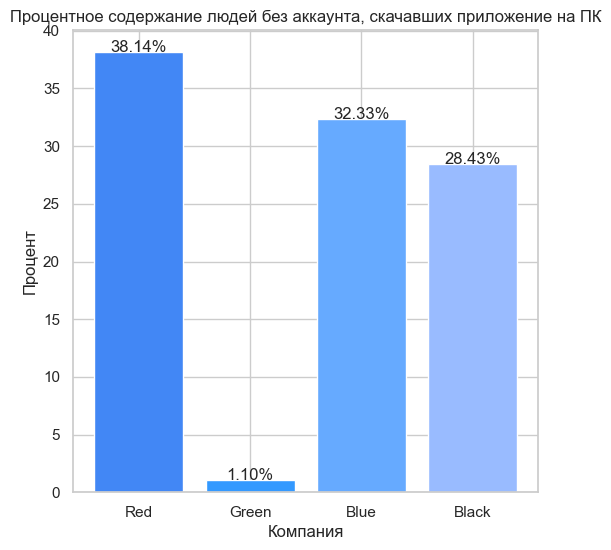

In [163]:
# Процентное содержание людей без аккаунта, скачавших приложение на ПК
not_registered_web = {
'Company': ['Red', 'Green', 'Blue', 'Black'],
'Not Registered': [
data[data['Red_web'] == 1].count()[0] - data[(data['Red_android'] == 1) & (data['active_Red'] != 0)].count()[0],
data[data['Green_web'] == 1].count()[0] - data[(data['Green_android'] == 1) & (data['has_Green_id'] != 0)].count()[0],
data[data['Blue_web'] == 1].count()[0] - data[(data['Blue_android'] == 1) & (data['has_Blue_id'] != 0)].count()[0],
data[data['Black_web'] == 1].count()[0] - data[(data['Black_android'] == 1) & (data['has_Black_id'] != 0)].count()[0]
]
}
df = pd.DataFrame(not_registered_web)
df['Percentage'] = df['Not Registered'] / all_i * 100

plt.figure(figsize=(6, 6))
plt.bar(df['Company'], df['Percentage'], color=['#4287f5', '#3399ff', '#66aaff', '#99bbff'])
plt.title('Процентное содержание людей без аккаунта, скачавших приложение на ПК')
plt.xlabel('Компания')
plt.ylabel('Процент')
for i, value in enumerate(df['Percentage']):
    plt.text(i, value, f"{value:.2f}%", ha='center')
plt.show()
df_web = df

На основе полученных данных уже можно сделать некоторые выводы, но для простоты суждений и удобства восприятия объединим графики в один общий график

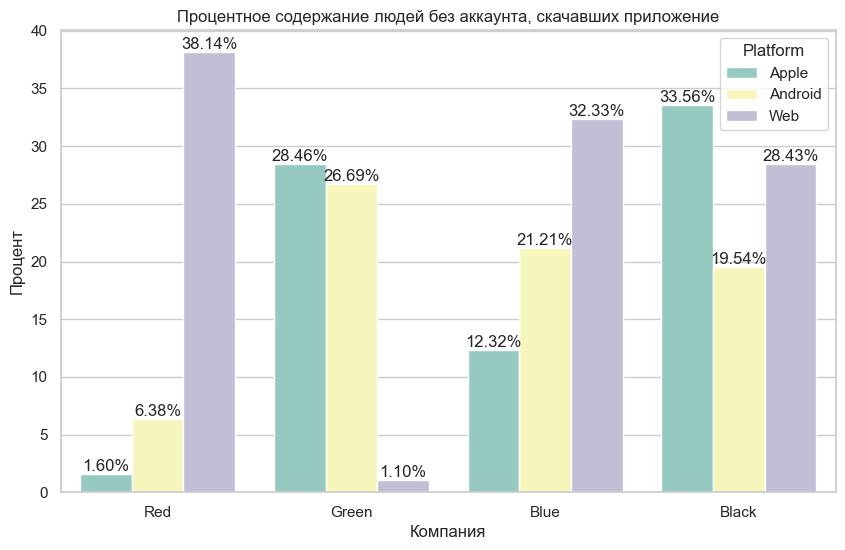

In [164]:
# Общий график долей незарегистрированных пользователей, скачавших приложения компаний, по платформам
# Объединение данных в один датафрейм
df_combined = pd.concat([df_apple, df_android, df_web])
df_combined['Platform'] = ['Apple'] * 4 + ['Android'] * 4 + ['Web'] * 4

# Настройка параметров графика
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Company', y='Percentage', hue='Platform', data=df_combined, palette='Set3')
plt.title('Процентное содержание людей без аккаунта, скачавших приложение')
plt.xlabel('Компания')
plt.ylabel('Процент')

# Добавление процентных значений над столбиками
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Отображение графика
plt.show()

#### Вывод №3.1. В разных компаниях наблюдаются разные пользовательские предпочтения в использовании сервисов компаний на различных платформах. Так, мы можем сделать выводы о пользователях компаний:
1. В компании Red пользователи в значительной степени предпочитают использовать ПК-версию приложения и наимение всего - на устройствах Apple. Это может быть связано с тем, что приложение отлично оптимизировано в качестве веб-приложения, и компании следует поработать над оптимизацией и продвижением приложения на мобильных платформах (в частности Apple)
2. В компании Green пользователи в значительной степени предпочитают использовать мобильную версию приложения (в частности Apple) и наимение всего веб-версию приложения. Это может быть связано с тем, что пользователям гораздо удобнее пользоваться сервисами на мобильных платформах, в отличие от веб-версии. Компании, вероятно, следует оптимизировать веб-версию приложения и ввести для привлечения пользователей специальные "фишки" сайта.
3. В компании Blue пользователи в значительной степени предпочитают использовать веб и Android-версию приложения и наимение всего - на устройствах Apple. Вероятно приложение на apple имеет какие-либо не оптимизированные, не рабочие моменты или просто отсутствующие функции, которые есть в остальных платформах. Компании следует улучшить работу приложения на платформе apple для более комфортного и вовлеченного пользования.
4. В компании Black пользователи в значительной степени предпочитают использовать apple и веб-версию приложения и наимение всего - на устройствах Android. Вероятно приложение на android имеет какие-либо не оптимизированные, не рабочие моменты или просто отсутствующие функции, которые есть в остальных платформах. Компании следует улучшить работу приложения на платформе android для более комфортного и вовлеченного пользования.

#### Вывод №3.2. Процентное содержание людей без аккаунта, скачавших приложение, различается в зависимости от компании и платформы:

1. Процентное содержание людей без аккаунта, скачавших приложение, различается в зависимости от компании и платформы.
2. Среди пользователей Apple-устройств компания Green имеет наибольший процент людей без аккаунта, скачавших приложение (28.46%), в то время как у компаний Red, Blue и Black этот процент ниже.
3. Среди пользователей Android-устройств компания Blue имеет наибольший процент людей без аккаунта, скачавших приложение (21.21%), в то время как у компаний Red, Green и Black этот процент ниже.
4. Среди пользователей веб-приложений компания Red имеет наибольший процент людей без аккаунта, скачавших приложение (38.14%), в то время как у компаний Green, Blue и Black этот процент ниже.
5. Общая тенденция показывает, что процент пользователей без аккаунта, скачавших приложение, на Apple-устройствах и веб-приложениях выше, чем на Android-устройствах.
6. Компания Green имеет наибольшую разницу между процентом пользователей без аккаунта, скачавших приложение, и процентом пользователей, зарегистрировавшихся через приложение, среди всех платформ. Это может указывать на проблемы в процессе регистрации или наличие других факторов, влияющих на уровень активации пользователей.

### Часть 4. Напоследок, проанализируем, является ли местонахождение пользователя в Москве влияющим параметром на его регистрацию в компании.

In [165]:
# определим доли пользователей в москве и вне столицы
in_moscow = len(data[(data['is_msk']!= 0)]) / (len(data[(data['is_msk']!= 0)]) + len(data[(data['is_msk']== 0)]))*100
out_moscow = len(data[(data['is_msk']== 0)]) / (len(data[(data['is_msk']!= 0)]) + len(data[(data['is_msk']== 0)]))*100

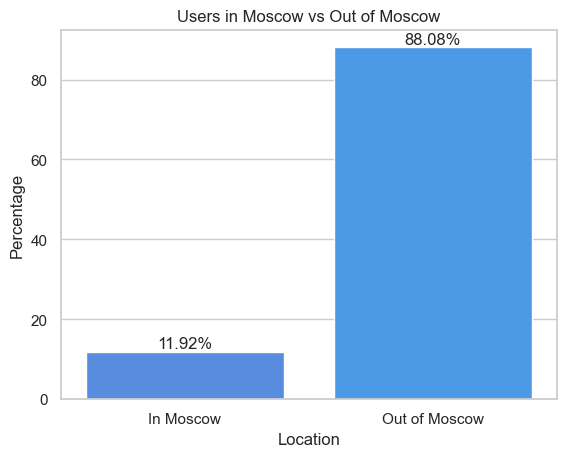

In [166]:
# Наглядно визуализируем получившиеся данные
labels = ['In Moscow', 'Out of Moscow']
sizes = [in_moscow, out_moscow]

data_frame = pd.DataFrame({'Location': labels, 'Percentage': sizes})

ax = sns.barplot(x='Location', y='Percentage', data=data_frame)
plt.xlabel('Location')
plt.ylabel('Percentage')
plt.title('Users in Moscow vs Out of Moscow')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()


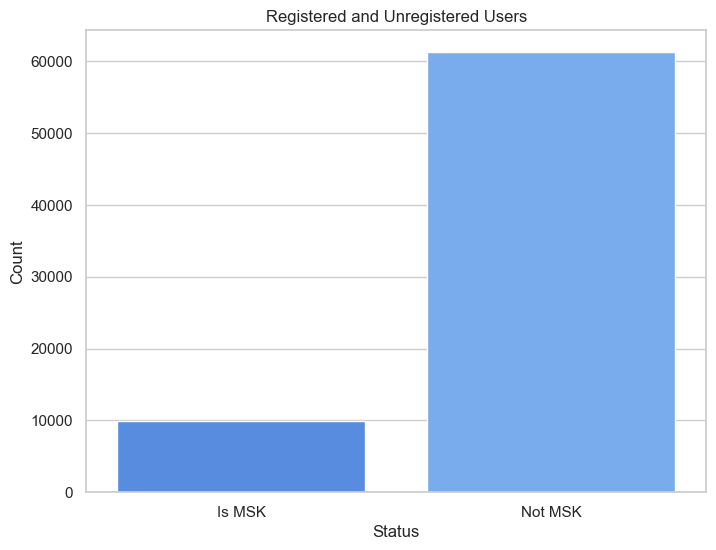

In [167]:
# Определение количества зарегистрированных и незарегистрированных пользователей в Москве и вне Москвы
registered_msk = len(active_red[active_red['is_msk'] != 0]) + len(registered_blue[registered_blue['is_msk'] != 0]) + len(registered_green[registered_green['is_msk'] != 0]) + len(registered_black[registered_black['is_msk'] != 0])
unregistered_msk = len(active_red[active_red['is_msk'] != 0]) + len(unregistered_blue[unregistered_blue['is_msk'] != 0]) + len(unregistered_green[unregistered_green['is_msk'] != 0]) + len(unregistered_black[unregistered_black['is_msk'] != 0])
registered_not_msk = len(active_red[active_red['is_msk'] == 0]) + len(registered_blue[registered_blue['is_msk'] == 0]) + len(registered_green[registered_green['is_msk'] == 0]) + len(registered_black[registered_black['is_msk'] == 0])
unregistered_not_msk = len(active_red[active_red['is_msk'] == 0]) + len(unregistered_blue[unregistered_blue['is_msk'] == 0]) + len(unregistered_green[unregistered_green['is_msk'] == 0]) + len(unregistered_black[unregistered_black['is_msk'] == 0])

# Создание датафрейма с результатами
data_counts = {
    'Status': ['Registered', 'Unregistered'],
    'In Moscow': [registered_msk, unregistered_msk],
    'Not in Moscow': [registered_not_msk, unregistered_not_msk]
}
df_counts = pd.DataFrame(data_counts)

# Визуализация данных с помощью seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.barplot(x=['Is MSK', 'Not MSK'], y=[registered_msk, registered_not_msk], palette=['#4287f5', '#66aaff'])
plt.title("Registered and Unregistered Users")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


#### Вывод: присутствие или отсутствие пользователя в Москве никак не влияет на его регистрацию в сервисе компаний. Наглядно видно что большая часть незарегистрировавшихся пользователей (как и зарегистрировавшихся) находится не в Москве, поэтому компаниям для привлечения пользователей к регистрации стоит прибегать к маркетинговой кампании не только в москве, но и в остальных регионах России.